In [238]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from scipy.optimize import minimize, brute

## I. One dimensional methods of Exhaustive search, Dichotomy, and Golden Section

In [239]:
def f1(x):
    return x**3

def f2(x):
    return abs(x-0.2)

def f3(x):
    return x * math.sin(1/x)

### Exhaustive Search

In [241]:
def find_n(a, b, e):
    return (b-a)/e

def exhaustive(a, b, e, fx, fname):
    n = find_n(a,b,e)
    xk = []    

    # running search
    for k in range(int(n)):
        x = a + k * (b-a)/n
        xk.append(fx(x))
    
    min_index = np.argmin(xk)

    # draw the plot
    x_index = np.arange(a, b, e)

    print(f'Total iteration - {n}')
    print(f'Total function calls - {n}')

    return x_index[min_index], xk[min_index]

In [268]:
print('Exhaustive Search on Function 1')
x1_xmin, x1_fmin = exhaustive(0, 1, 0.001, f1, 'f(x) = x^3')
print(f'Minimum at x{x1_xmin} with value {x1_fmin}', end='\n\n')

print('Exhaustive Search on Function 2')
x2_xmin, x2_fmin = exhaustive(0, 1, 0.001, f2, 'f(x) = |x-0.2|')
print(f'Minimum at x{x2_xmin} with value {x2_fmin}', end='\n\n')

print('Exhaustive Search on Function 3')
x3_xmin, x3_fmin = exhaustive(0.01, 1, 0.001, f3, 'f(x) = x * sin(1/x)')
print(f'Minimum at x{x3_xmin:.4f} with value {x3_fmin:.4f}', end='\n\n')

Exhaustive Search on Function 1
Total iteration - 1000.0
Total function calls - 1000.0
Minimum at x0.0 with value 0.0

Exhaustive Search on Function 2
Total iteration - 1000.0
Total function calls - 1000.0
Minimum at x0.2 with value 0.0

Exhaustive Search on Function 3
Total iteration - 990.0
Total function calls - 990.0
Minimum at x0.2230 with value -0.2172



### Dichotomy Search

In [254]:
def dichotomy(a, b, e, fx, verbose=False):

    delta = random.uniform(0,e)

    # steps of each iteration
    steps = []
    steps.append(f'a = {a}, b = {b}, delta = {delta}')

    iter, f_iter = 0, 0
    
    while abs(a - b) > e:
        # find central
        x1 = (a + b - delta) / 2
        x2 = (a + b + delta) / 2

        # update a b
        if fx(x1) <= fx(x2):
            a, b = a, x2
        else:
            a, b = x1, b

        steps.append(f'a = {a:.5f}, b = {b:.5f}, x1 = {x1:.5f}, x2 = {x2:.5f}, delta = {delta:.5f}')
        iter += 1
        f_iter += 2

    if verbose:
        print('\n'.join(steps), end='\n\n')

    print(f'Total iteration - {iter}')
    print(f'Total function calls - {f_iter}')
    print(f'Minimum at x{a:.4f} with value {fx(a):.4f}')

    return a, b, iter, f_iter

In [255]:
print('Dichotomy Search on Function 1')
dichotomy(0, 1, 0.001, f1, verbose=False)

Dichotomy Search on Function 1
Total iteration - 12
Total function calls - 24
Minimum at x0.0000 with value 0.0000


(0, 0.000914863564560367, 12, 24)

In [256]:
print('Dichotomy Search on Function 2')
dichotomy(0, 1, 0.001, f2, verbose=False)

Dichotomy Search on Function 2
Total iteration - 11
Total function calls - 22
Minimum at x0.1997 with value 0.0003


(0.19968870081793755, 0.20026872386361444, 11, 22)

In [269]:
print('Dichotomy Search on Function 3')
dichotomy(0.01, 1, 0.001, f3, verbose=False)

Dichotomy Search on Function 3
Total iteration - 12
Total function calls - 24
Minimum at x0.2220 with value -0.2172


(0.2220494889967688, 0.22304874020204438, 12, 24)

### Golden Search

In [257]:
def golden(a, b, e, fx, verbose=False):

    # step logs
    steps = []

    iter = 0

    while abs(a - b) > e:
        # find central on first iteration
        if iter == 0:        
            x1 = a + (3 - math.sqrt(5)) / 2 * (b - a)
            x2 = b + (math.sqrt(5) - 3) / 2 * (b - a)

            steps.append(f'a = {a:.5f}, b = {b:.5f}, x1 = {x1:.5f}, x2 = {x2:.5f}')

            # f_iter += 1

        # update a b
        if fx(x1) <= fx(x2):
            a, b, x2 = a, x2, x1
            x1 = a + (3 - math.sqrt(5)) / 2 * (b - a)
        else:
            a, b, x1 = x1, b, x2
            x2 = b + (math.sqrt(5) - 3) / 2 * (b - a)

        steps.append(f'a = {a:.5f}, b = {b:.5f}, x1 = {x1:.5f}, x2 = {x2:.5f}')
        iter += 1
        # f_iter += 1

    if verbose:
        print('\n'.join(steps), end='\n\n')
    print(f'Total iteration - {iter}')
    print(f'Total function calls - {len(steps)}')
    print(f'Minimum at x{a:.4f} with value {fx(a):.4f}')

    return a, b, iter, len(steps)


In [267]:
print('Golden Section Search on Function 1')
golden(0, 1, 0.001, f1, verbose=False)

Golden Section Search on Function 1
Total iteration - 15
Total function calls - 16
Minimum at x0.0000 with value 0.0000


(0, 0.000733137435857404, 15, 16)

In [259]:
print('Golden Section Search on Function 2')
golden(0, 1, 0.001, f2, verbose=False)

Golden Section Search on Function 2
Total iteration - 15
Total function calls - 16
Minimum at x0.1997 with value 0.0003


(0.199706745025657, 0.2004398824615144, 15, 16)

In [270]:
print('Golden Section Search on Function 3')
golden(0.01, 1, 0.001, f3, verbose=False)

Golden Section Search on Function 3
Total iteration - 15
Total function calls - 16
Minimum at x0.2224 with value -0.2172


(0.22235669058885382, 0.22308249665035265, 15, 16)

## II. Multi dimensional methods of Exhaustive search, Gauss, and Nelder-Mead

In [224]:
def generate_ab(seed=None):
    if seed != None:
        random.seed(seed)
    return random.random(), random.random()

def generate_noisy(a, b):
    x = np.array([k/100 for k in range(100)])
    y = np.array([(a * xk + b + np.random.normal(0,1)) for xk in x])
    
    return x, y
    
def _linear(a, b, x):
    return a * x + b

def _rational(a, b, x):
    return a / (1 + b * x)

def linear(init_point, *args):
    '''please pass x and y into *args'''
    a, b = init_point
    x, y = args[0], args[1]    
    return np.sum((_linear(a,b,x) - y)**2)

def rational(init_point, *args):
    '''please pass x and y into *args'''
    a, b = init_point
    x, y = args[0], args[1]
    return np.sum((_rational(a, b, x) - y)**2)

0.7123429878269185 0.8397997363118733


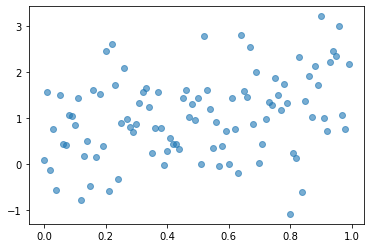

In [230]:
a, b = generate_ab(24)
x, y = generate_noisy(a, b)
yk = a * x + b
print(a, b)

plt.scatter(x, y, alpha=0.6)
plt.show()

### Exhaustive

In [279]:
grid = (slice(a, b, 0.001), slice(a, b, 0.001))

print('Exhaustive Search on Linear function')
exhaustive_linear = brute(linear, grid, args=(x, y), disp=True)
print(exhaustive_linear, end='\n\n')

print('Exhaustive Search on Rational function')
exhaustive_rational = brute(rational, grid, args=(x, y), disp=True)
print(exhaustive_rational)

Exhaustive Search on Linear function
Optimization terminated successfully.
         Current function value: 70.687447
         Iterations: 31
         Function evaluations: 57
[0.96263248 0.56182732]

Exhaustive Search on Rational function
Optimization terminated successfully.
         Current function value: 69.752096
         Iterations: 44
         Function evaluations: 85
[ 0.65247344 -0.63887088]


### Gauss

In [275]:
print('Gauss (coordinate descent) on Linear function')
gauss_linear = minimize(linear, [a, b], args=(x, y), method='Powell', tol=0.001, options={'disp': True})
print(gauss_linear['x'], end='\n\n')

print('Gauss (coordinate descent) on Rational function')
gauss_rational = minimize(rational, [a, b], args=(x, y), method='Powell', tol=0.001, options={'disp': True})
print(gauss_rational['x'])

Gauss (coordinate descent) on Linear function
Optimization terminated successfully.
         Current function value: 70.687447
         Iterations: 3
         Function evaluations: 95
[0.96266095 0.56180623]

Gauss (coordinate descent) on Rational function
Optimization terminated successfully.
         Current function value: 69.752097
         Iterations: 5
         Function evaluations: 127
[ 0.65240855 -0.63894954]


### Nelder-Mead

In [276]:
print('Nelder-Mead on Linear function')
nelder_linear = minimize(linear, [a, b], args=(x, y), method='nelder-mead', tol=0.001, options={'disp': True})
print(nelder_linear['x'], end='\n\n')

print('Nelder-Mead on Rational function')
nelder_rational = minimize(rational, [a, b], args=(x, y), method='nelder-mead', tol=0.001, options={'disp': True})
print(nelder_rational['x'])

Nelder-Mead on Linear function
Optimization terminated successfully.
         Current function value: 70.687448
         Iterations: 28
         Function evaluations: 54
[0.96275325 0.56185148]

Nelder-Mead on Rational function
Optimization terminated successfully.
         Current function value: 69.752113
         Iterations: 38
         Function evaluations: 73
[ 0.65290368 -0.63832734]


### Plot

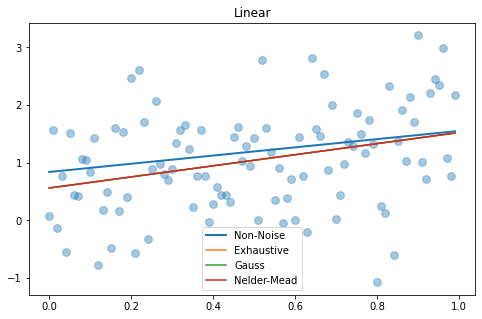

In [277]:
plt.figure(figsize=(8,5))
plt.title('Linear')
plt.scatter(x, y, alpha=0.4, s=60)
plt.plot(x, yk, linewidth=2, label='Non-Noise')
plt.plot(x, _linear(exhaustive_linear[0], exhaustive_linear[1], x), label='Exhaustive')
plt.plot(x, _linear(gauss_linear['x'][0], gauss_linear['x'][1], x), label='Gauss')
plt.plot(x, _linear(nelder_linear['x'][0], nelder_linear['x'][1], x), label='Nelder-Mead')
plt.legend()
plt.show()

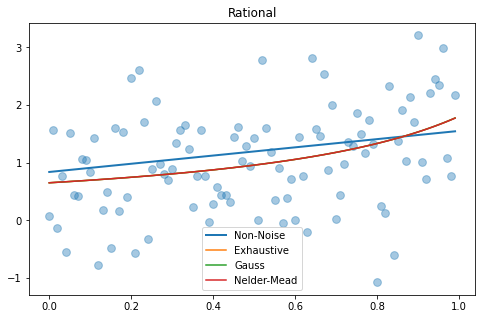

In [278]:
plt.figure(figsize=(8,5))
plt.title('Rational')
plt.scatter(x, y, alpha=0.4, s=60)
plt.plot(x, yk, linewidth=2, label='Non-Noise')
plt.plot(x, _rational(exhaustive_rational[0], exhaustive_rational[1], x), label='Exhaustive')
plt.plot(x, _rational(gauss_rational['x'][0], gauss_rational['x'][1], x), label='Gauss')
plt.plot(x, _rational(nelder_rational['x'][0], nelder_rational['x'][1], x), label='Nelder-Mead')
plt.legend()
plt.show()